# Achievement 6.2_Exploratory Visual Analysis

## Contents
- ### Importing Libraries
- ### Visual Styling
- ### Importing Data
- ### Reviewing Data after import
- ### Current Questions to Consider
- ### Correlation Heatmap
- ### Scatterplot(s) for Top Correlations
- ### Pair Plot of All Variables
- ### Categorial Plots
    - #### Financial Loss by Target Industry
    - #### Resolution Time by Defense Mechanism
    - #### Financial Loss by Attack Type
- ### Financial Loss by Vulnerability Type
## Revisit Questions
## Begin Hypothesis Theorizing

### Importing Libraries

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set styles
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)

### Visual Styling

In [3]:
# Set styles
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

### Importing Data

In [4]:
# Load the dataset
working_df = pd.read_csv(r'C:\Users\rewha\Desktop\0.CareerFoundry\2.Data Immersion_ACH 06-Advanced Analytics and Dashboard Design\02_Data\02.02_Data Cleaned\Global_Cybersecurity_Threats_2015-2024-First_Pass.csv')

### Reviewing Data after import

In [5]:
# Verify Data Structure
working_df.head()

,Unnamed: 0,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,2,India,2017,Man-In-The-Middle,It,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-State,Social Engineering,AI-based Detection,7
4,4,Germany,2018,Man-In-The-Middle,It,74.41,810682,Insider,Social Engineering,VPN,68


In [6]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           3000 non-null   int64  
 1   Country                              3000 non-null   object 
 2   Year                                 3000 non-null   int64  
 3   Attack Type                          3000 non-null   object 
 4   Target Industry                      3000 non-null   object 
 5   Financial Loss (in Million $)        3000 non-null   float64
 6   Number of Affected Users             3000 non-null   int64  
 7   Attack Source                        3000 non-null   object 
 8   Security Vulnerability Type          3000 non-null   object 
 9   Defense Mechanism Used               3000 non-null   object 
 10  Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(4), objec

In [7]:
# Removing Index Column
working_df.drop(columns=['Unnamed: 0'], errors='ignore', inplace=True)

In [8]:
# Verifying Removal
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


### Current Questions to Consider

**NOTE:** These are in order of which ones I would like to try and tackle; however, the data ultimately has the final say.
1. How effective are different defense mechanisms in reducing resolution time or financial damage?
2. How many millions are lost per hour of incident resolution, and has this increased or decreased since 2015?
3. Are there specific vulnerability types that are commonly exploited in high-impact attacks and that result in the highest losses?
4. Which industries face the highest number of attacks and greatest financial losses?

### Correlation Heatmap

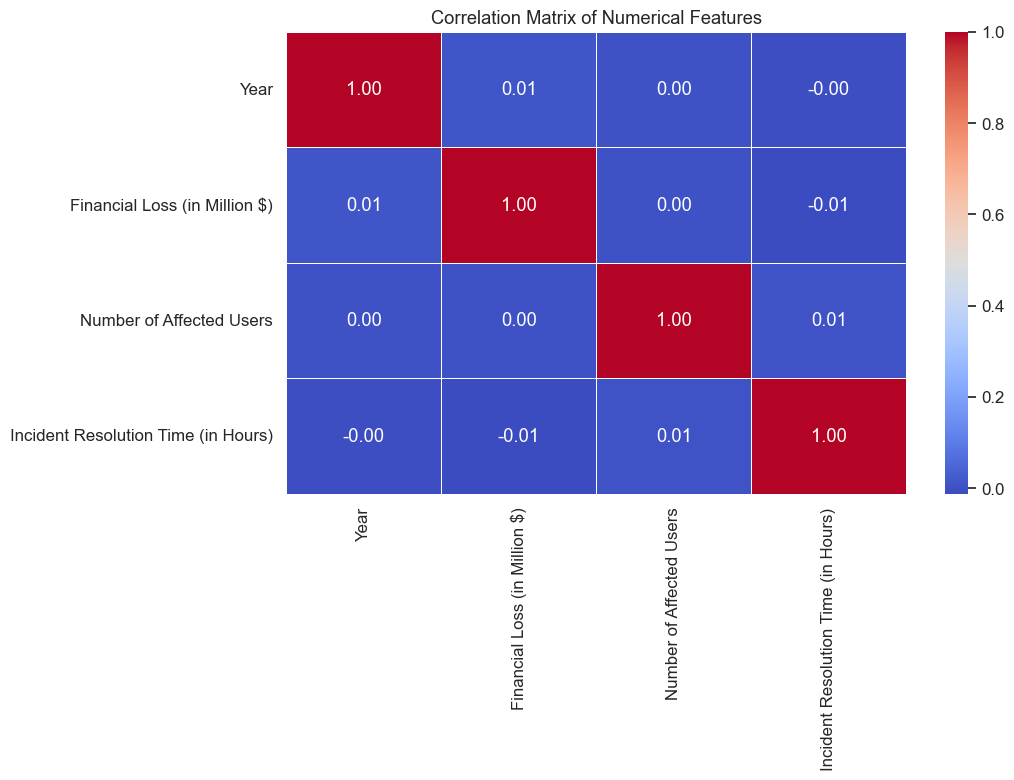

In [9]:
plt.figure(figsize=(10, 6))
numeric_cols = working_df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_cols.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### Key Observations:
**No strong correlations exist among the variables.:** Most coefficients are very close to zero, indicating very weak or no linear relationships.

**Financial Loss vs. Incident Resolution Time:** Despite the intuition that longer resolution times might incur greater financial losses, the correlation is nearly zero (-0.01). This suggests no consistent linear pattern between how long an incident takes to resolve and how much it costs.

**Number of Affected Users vs. Financial Loss:** Unfortunately, we again have a near-zero correlation, meaning there is no evidence showing larger user impact results in higher financial costs.

**Year vs. Other Variables:** The correlation between Year and the other features is essentially nonexistent. This suggests that across the 2015–2024 timeframe, there hasn’t been a strong upward or downward trend in financial losses, user impact, or resolution time.

### Scatterplot(s) for Top Correlations

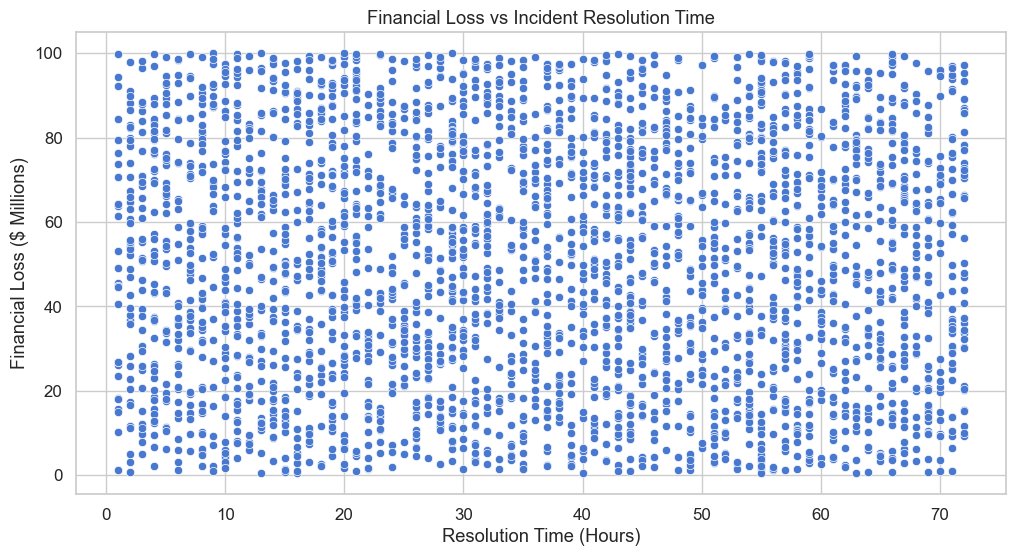

In [10]:
# Financial Loss vs Incident Resolution Time
sns.scatterplot(data=working_df, x='Incident Resolution Time (in Hours)', y='Financial Loss (in Million $)')
plt.title('Financial Loss vs Incident Resolution Time')
plt.xlabel('Resolution Time (Hours)')
plt.ylabel('Financial Loss ($ Millions)')
plt.show()

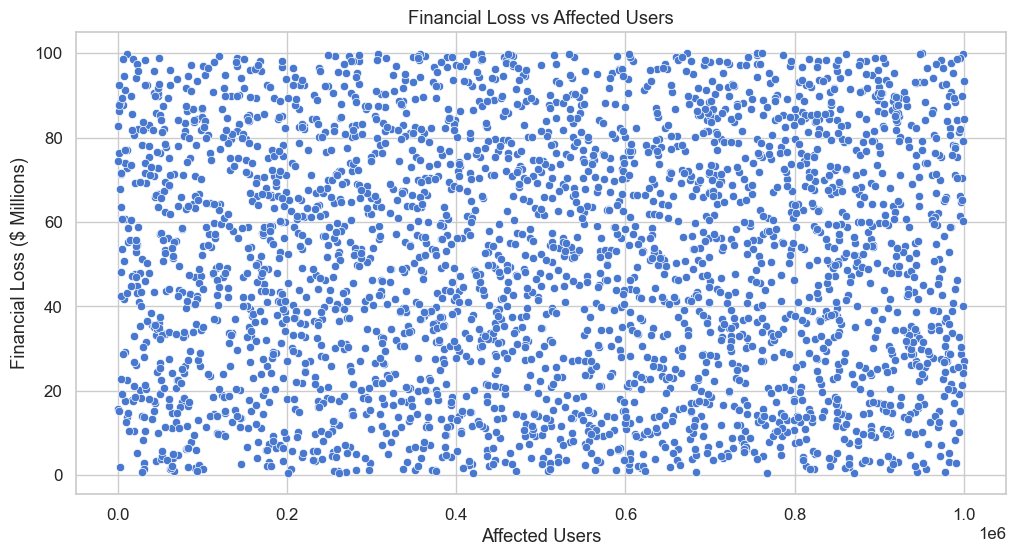

In [11]:
# Financial Loss vs Affected Users
sns.scatterplot(data=working_df, x='Number of Affected Users', y='Financial Loss (in Million $)')
plt.title('Financial Loss vs Affected Users')
plt.xlabel('Affected Users')
plt.ylabel('Financial Loss ($ Millions)')
plt.show()

#### Key Observations:
**Financial Loss vs. Affected Users:** The points are spread out with no clear trend. This means financial loss doesn't necessarily increase with more users affected. Some incidents with fewer users still caused high losses.

**Financial Loss vs. Resolution Time:** Again, there's no obvious pattern. Longer resolution times don't always lead to higher financial losses.

So far I'm not having much luck in seeing correlations, but hopefully moving beyond the numerical variables will start giving me some usable results.

### Pair Plot of All Variables

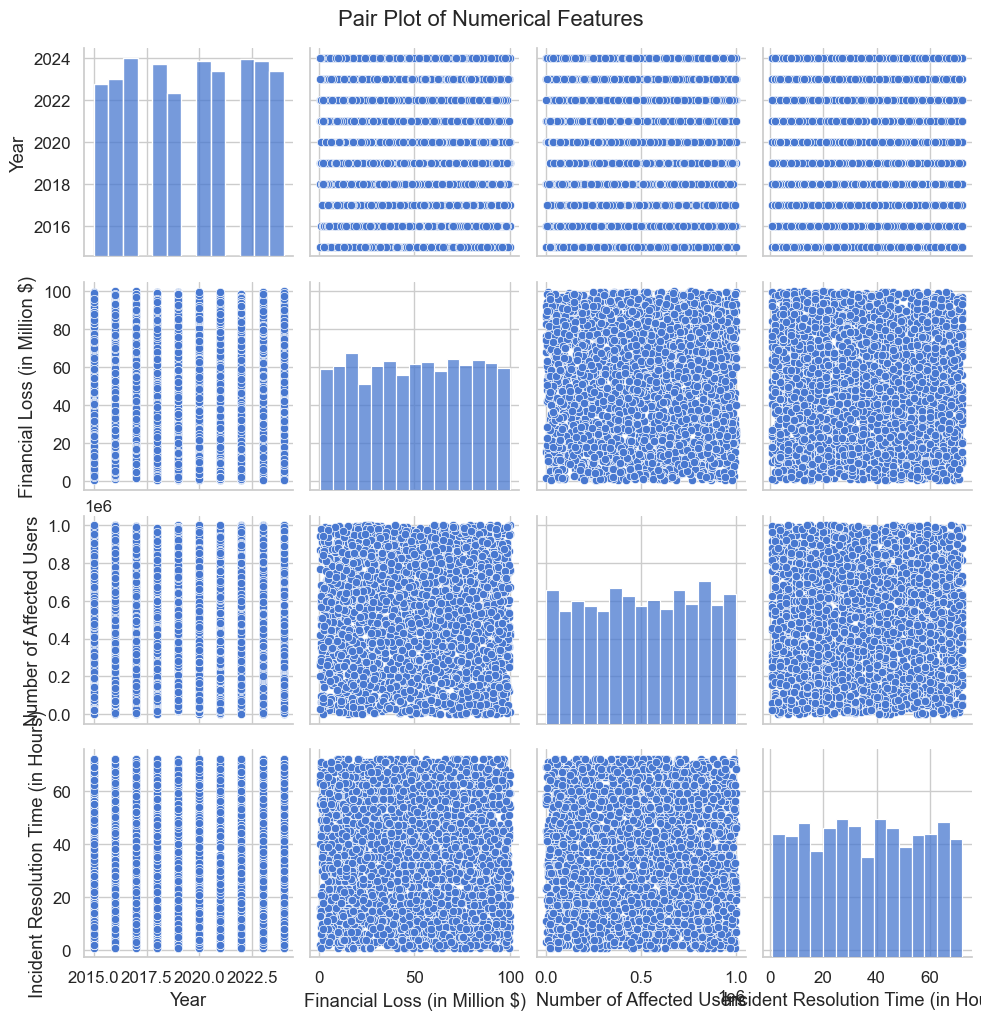

In [12]:
sns.pairplot(numeric_cols)
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

#### Key Observations:

Scatterplots off-diagonal show no real linear trends or clusters. Sadly, as seen above, the numerical variables seem to be weak or random when it comes to their relationships. 

##### Variable Pairs with Potential:
1. Financial Loss vs Year
2. Number of Affected Users vs Financial Loss
3. Incident Resolution Time vs Financial Loss

##### Why?
- **Financial Loss vs Year:** 
    - Has the potential to show if financial impact is increasing or decreasing over time.
- **Number of Affected Users vs Financial Loss:** 
    - While no trend is immediately clear, this is still worth a deeper look to see if some types of attacks cause high losses with few users affected. Especially since this would likely be a major concern for many stakeholders.
- **Incident Resolution Time vs Financial Loss:** 
    - Explore whether fast vs. slow responses impact cost under different conditions (e.g., industry type).

### Categorial Plots

#### Financial Loss by Target Industry

C:\Users\rewha\AppData\Local\Temp\ipykernel_9436\2853131389.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=working_df, x='Target Industry', y='Financial Loss (in Million $)', palette='pastel')


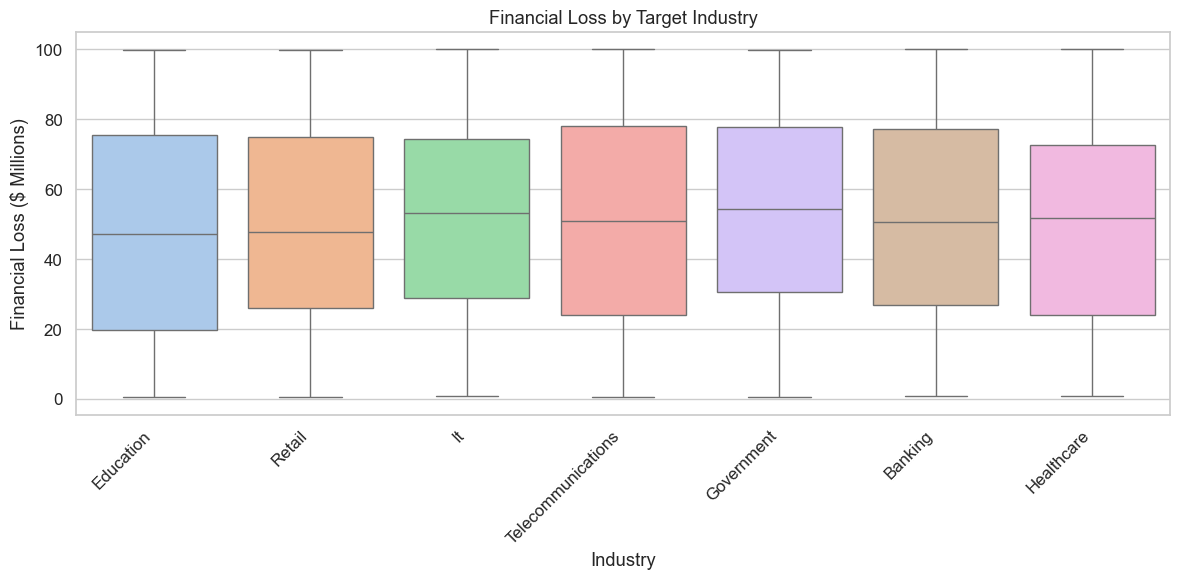

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=working_df, x='Target Industry', y='Financial Loss (in Million $)', palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.title('Financial Loss by Target Industry')
plt.xlabel('Industry')
plt.ylabel('Financial Loss ($ Millions)')
plt.tight_layout()
plt.show()

#### Key Observations:
**Government** and **Telecommunications** take the top 2 spots for higher median losses.
It is notable that **Healthcare** and **Education** also have moderate losses but show variation.

This makes sense since, being in the industry myself, I know all industries surge and fall when it comes to their "popularity," but **Governments** and **Telecommunications** are always key targets due to reasons ranging from sabotage, destruction, financial exploitation, politics, etc. 

This is why industry-specific security strategies are important. Sectors handling sensitive data or infrastructure may face higher costs, making it a constant topic for organizational leadership.

#### Resolution Time by Defense Mechanism

C:\Users\rewha\AppData\Local\Temp\ipykernel_9436\2744841382.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=working_df, x='Defense Mechanism Used', y='Incident Resolution Time (in Hours)', palette='muted')


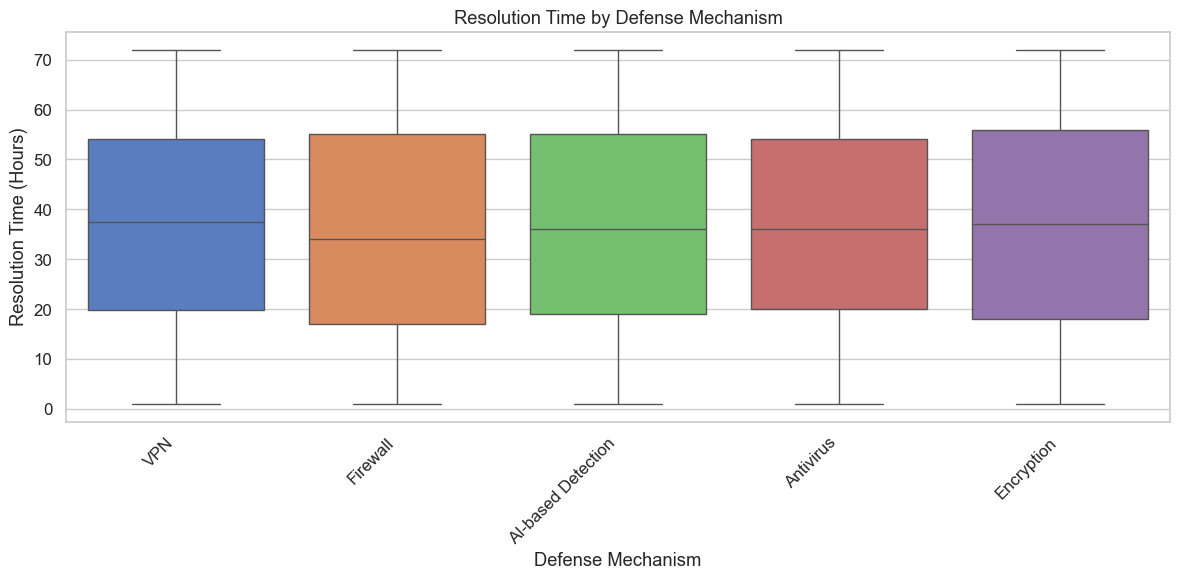

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=working_df, x='Defense Mechanism Used', y='Incident Resolution Time (in Hours)', palette='muted')
plt.xticks(rotation=45, ha='right')
plt.title('Resolution Time by Defense Mechanism')
plt.xlabel('Defense Mechanism')
plt.ylabel('Resolution Time (Hours)')
plt.tight_layout()
plt.show()

#### Key Observations:
The two with the lowest median time are first **Firewall** and second **Antivirus**. 

Unfortunately, none of them really stand head and shoulders over the others, so while not a useless comparison, it may be more valuable once considered with things like setup time, maintenance cost, etc. 

#### Financial Loss by Attack Type

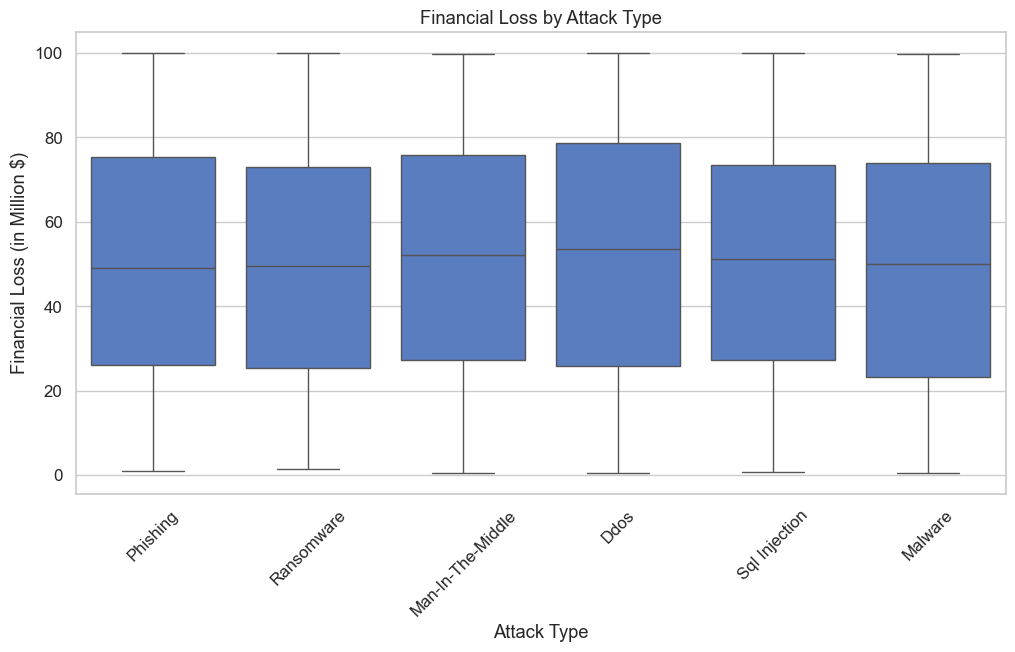

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=working_df, x='Attack Type', y='Financial Loss (in Million $)')
plt.xticks(rotation=45)
plt.title('Financial Loss by Attack Type')
plt.show()

#### Key Observations:
So again we have one that doesn't show a clear-cut variable to target over all others. 

**DDoS attacks** have a slightly higher median financial loss compared to others, but the variation is high for every one of them, so any attack has the potential to be costly.

I guess in reflecting on this from my real-world experience, it likely wouldn't be wise to chase a single type even if the data pointed towards it, as I know there have been spurts of attack types to become popular randomly. Meaning if you are not ready for them at all despite them being far less frequent, they will hit you twice as hard as if you tried to cover all bases. 

### Financial Loss by Vulnerability Type

C:\Users\rewha\AppData\Local\Temp\ipykernel_9436\3836947608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


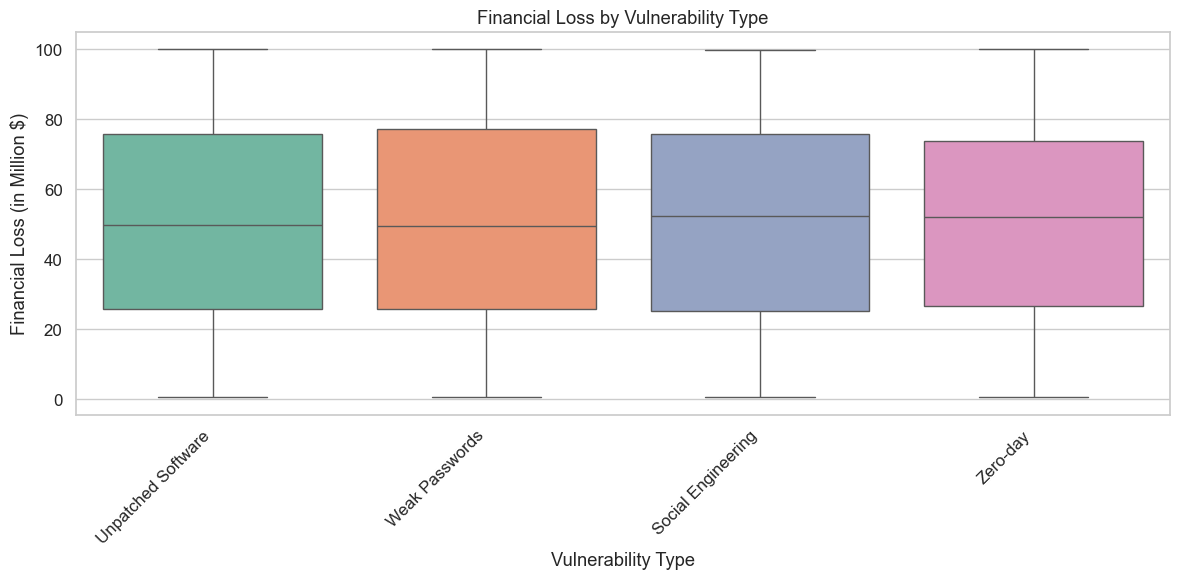

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=working_df, 
    x='Security Vulnerability Type', 
    y='Financial Loss (in Million $)', 
    palette='Set2'
)
plt.xticks(rotation=45, ha='right')
plt.title('Financial Loss by Vulnerability Type')
plt.xlabel('Vulnerability Type')
plt.ylabel('Financial Loss (in Million $)')
plt.tight_layout()
plt.show()

#### Key Observations:
As with the others, the top two of the vulnerabilities with slightly higher medians are **Social Engineering** and **Zero-day**.

All **Vulnerability Types** vary widely, however, with points to any of them having the potential for a high impact should they be used, depending on how each scenario plays out. 

#### Categorical Plot Collective Takeaway:

These plots help reveal where **Financial Losses** vary the most and which categories I can possibly take a closer look at. 

While no single factor guarantees high or low loss, looking at **Attack Types** and **Target Industries** gives me some helpful direction for strategy and further analysis.

### Financial Loss Category by Attack Type

In [20]:
# Create a binned categorical variable from financial loss
working_df['Financial Loss Category'] = pd.qcut(working_df['Financial Loss (in Million $)'], q=3, labels=['Low', 'Medium', 'High'])

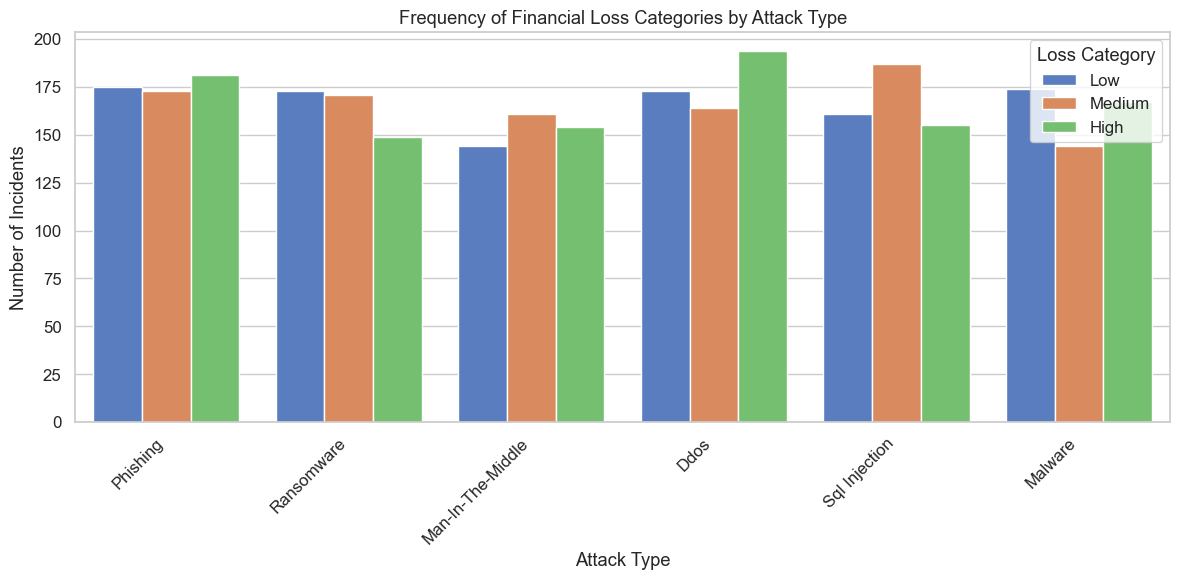

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=working_df, x='Attack Type', hue='Financial Loss Category')
plt.title('Frequency of Financial Loss Categories by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loss Category')
plt.tight_layout()
plt.show()

#### Key Observations:

**DDoS** and **SQL Injections** are the top types linked with high financial losses.

**Ransomware** & **Man-in-the-Middle** are the two leaning more towards the lower/medium loss end.
Thankfully this categorization does highlight that different **Attack Types** carry different financial risks, which shows great potential in future modeling and analyses. 

## Revisit Questions

#### Original Questions with New Insights

1. **How effective are different defense mechanisms in reducing resolution time or financial damage?**
    * Firewall and Antivirus show slightly faster resolution times.
    * All mechanisms have wide variability, so setup likely matters more than type.
2. **How many millions are lost per hour of incident resolution, and has this increased or decreased since 2015?**
    * No strong link between resolution time and financial loss.
    * Financial loss appears stable across years, no clear upward or downward trend.
3. **Are there specific vulnerability types exploited in high-loss attacks?**
    * **Social Engineering** and **Zero-day** attacks tend to cause slightly higher financial losses.
    * No single vulnerability type overwhelmingly dominates.
4. **Which industries face the most attacks and highest losses?**
    * Government and Telecommunications show the highest median financial losses and the widest range.

---

#### New Questions

1. Do certain attack types target specific industries more often?
2. Are defense mechanisms used differently by industry?
3. Does resolution time vary by attack type?
4. Are certain vulnerability types linked to slower resolutions or higher loss?

## Begin Hypothesis Theorizing 

#### **Original Forerunners Hypotheses**
1. **"Incidents involving outdated software vulnerabilities result in higher financial loss than others."**
     - _Status:_
	     - Still under review — not yet explored through vulnerability-specific visualizations.
    
2. **"Financial loss increases linearly with the number of affected users."**
    - _Updated Hypothesis:_
	    - **“Financial loss does not significantly correlate with the number of affected users.”**
     - _Train of Thought:_
	    - The scatterplot shows no visible linear trend or clustering to support this.
    
3. **"The use of automated defense mechanisms leads to shorter resolution times."**
     - _Updated Hypothesis:_
	    - **“Automated defenses like AI detection do not consistently reduce resolution time compared to traditional methods.”**
     - _Train of Thought:_
	     - Boxplots reveal inconsistent performance across defense types.

---

#### **New Hypotheses due to Visual Findings**
4. **“Government and telecommunications industries experience higher median financial losses than other sectors.”**
     - _Train of Thought:_
	     - Boxplots show these industries as frequent outliers with higher IQRs.
    
5. **“Resolution time varies by defense mechanism, but not dramatically — implementation quality may matter more than type.”**
     - _Train of Thought:_
	     - Visual ranges overlap across defense methods; medians are similar.
    
6. **“Attack type does not significantly affect median financial loss.”**
     - _Train of Thought:_
	     - Boxplots of loss by attack type show similar distributions across categories.

---

#####  Please Note
- I know I am running a little heavy on hypotheses, as at least in our original achievements teaching us questions and hypotheses, we started with upward of a dozen questions and quickly worked our way down in batches based on what the data was telling us. 
- I hope it is ok that I wanted to add the extra three since a good chunk of my findings thus far are not showing much correlation or variation, so I don't want to narrow too quickly and end up having to use a hypothesis I feel is either mundane or not very realistic for stakeholders to actually need. 
- Hope that makes sense. 